# Juno Talk

Here we make plots to double check Jimmy's work for his talk on 10/4/2021

In [1]:
#Need this to add libraries in parent folder
import sys
sys.path.append('..')
sys.path.append('.')
sys.path.append('../lib')

In [2]:
import lib.analysis as anl 
import lib.array_ops as ao
import lib.data_h5 as dh5
import lib.data_netcdf4 as dnc
import lib.fpc as fpc
import lib.frametransform as ft
import lib.metadata as md

import lib.plot.oned as plt1d
import lib.plot.twod as plt2d
import lib.plot.debug as pltdebug
import lib.plot.fourier as pltfr
import lib.plot.resultsmanager as rsltmng
import lib.plot.velspace as pltvv

import os
import math
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [33]:
def make_C_pmesh(v1,v2,vmax,Array):
    maxCe = max(np.max(Array),abs(np.max(Array)))

    
    plt.figure()
    plt.style.use("postgkyl.mplstyle") 
    #plt.facecolor(bkgcolor)
    plt.pcolormesh(v1,v2,Array, vmax=maxCe, vmin=-maxCe, cmap="seismic", shading="gouraud")#,norm=LogNorm(vmin=minval, vmax=H.max()))
    plt.xlim(-vmax, vmax)
    plt.ylim(-vmax, vmax)
#     plt.set_xticks(np.linspace(-vmax, vmax, numtks))
#     plt.set_yticks(np.linspace(-vmax, vmax, numtks))
#     plt.set_xlabel(r"$v_x/v_{ti}$")
#     plt.set_ylabel(r"$v_z/v_{ti}$")
    plt.grid(color="grey", linestyle="--", linewidth=1.0, alpha=0.6)
    plt.colorbar()
    #plt.aspect('equal', 'box')
    plt.show()
    

In [34]:
def make_H_pmesh(v1,v2,vmax,Array):
    plt.figure()
    plt.style.use("postgkyl.mplstyle") 
    #plt.facecolor(bkgcolor)
    plt.pcolormesh(v1,v2,Array, cmap="plasma", shading="gourand")#,norm=LogNorm(vmin=minval, vmax=H.max()))
    plt.xlim(-vmax, vmax)
    plt.ylim(-vmax, vmax)
#     plt.set_xticks(np.linspace(-vmax, vmax, numtks))
#     plt.set_yticks(np.linspace(-vmax, vmax, numtks))
#     plt.set_xlabel(r"$v_x/v_{ti}$")
#     plt.set_ylabel(r"$v_z/v_{ti}$")
    plt.grid(color="grey", linestyle="--", linewidth=1.0, alpha=0.6)
    plt.colorbar()
    #plt.aspect('equal', 'box')
    plt.show()
    

## Load data

In [5]:
# # load analysis file
# analysisflnm = '../analysisinputs/m03input.txt'
# path,resultsdir,vmax,dv,numframe,dx,xlim,ylim,zlim = anl.analysis_input(flnm = analysisflnm)
# path_particles = path+'Output/Raw/Sp01/raw_sp01_{:08d}.h5'

In [6]:
# #make results directory
# resultstag = 'M03'
# resultsdir = resultstag+'results/'
# os.system('mkdir ' + resultsdir)

In [43]:
path = '/srv/data/simulation/dHybridR/2021.05.Perp_Shocks/Batch02/M06_th45/'
numframe = 2000
#load fields
dfields = dh5.field_loader(path=path,num=numframe)

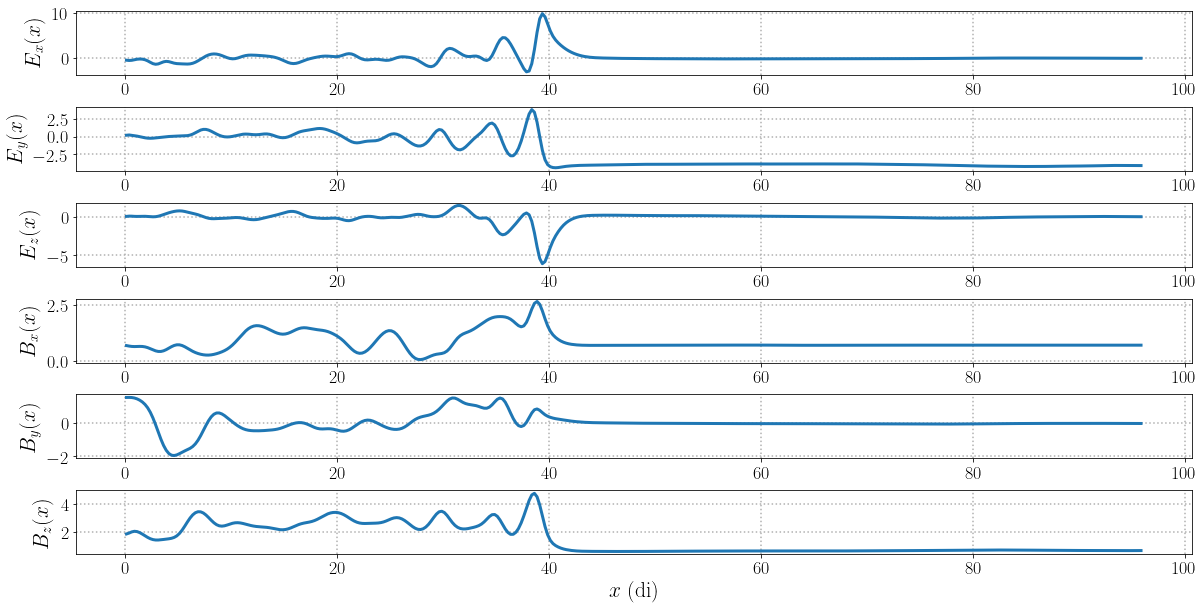

In [45]:
plt1d.plot_all_fields(dfields, axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

In [48]:
path='/srv/data/simulation/dHybridR/2021.05.Perp_Shocks/Batch03/M06_th45_ppc10000/'
numframe = 4000
#load fields
dfields = dh5.field_loader(path=path,num=numframe)

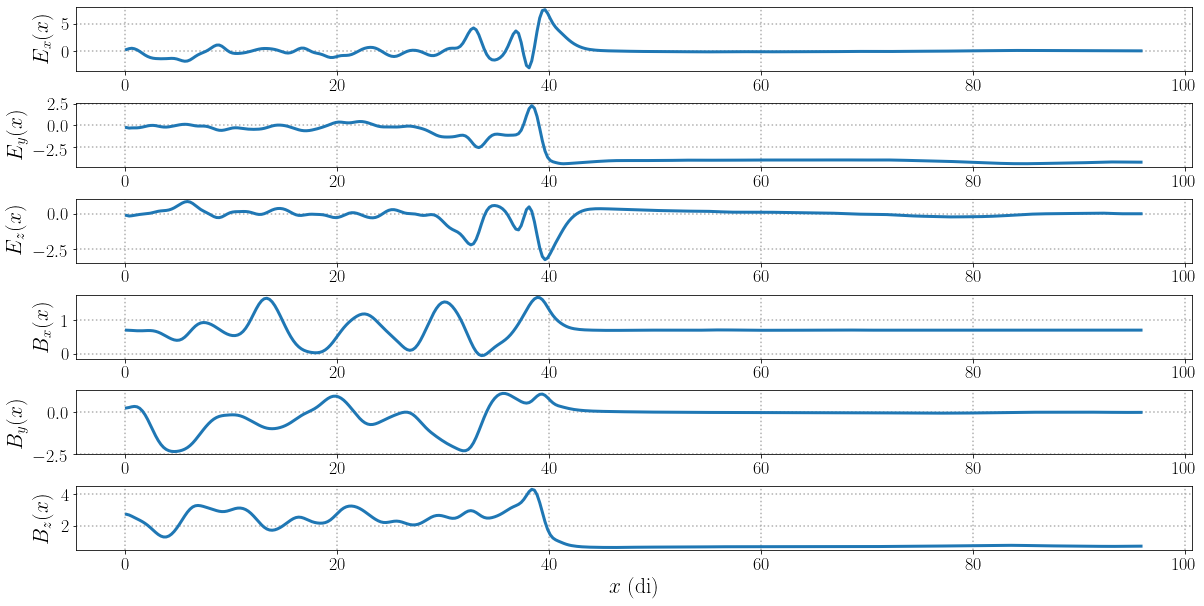

In [49]:
plt1d.plot_all_fields(dfields, axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

### Make FPCs

In [171]:
ncflnm = '../junoM06_th45resultst20003di/FPCnometadata.nc'
Hist, CEx, CEy, CEz, vx, vy, vz, x, enerCEx, enerCEy, enerCEz, Vframe_relative_to_sim, metadata_in, params_in = dnc.load3Vnetcdf4(ncflnm)

In [172]:
vmax = 25.

In [173]:
x

array([32.25, 32.75, 33.25, 33.75, 34.25, 34.75, 35.25, 35.75, 36.25,
       36.75, 37.25, 37.75, 38.25, 38.75, 39.25, 39.75, 40.25, 40.75,
       41.25, 41.75, 42.25, 42.75, 43.25, 43.75, 44.25, 44.75],
      dtype=float32)

In [174]:
ao.find_nearest(x, 44.75)

25

In [175]:
x[15]

39.75

In [176]:
for i in range(0,len(Hist)):
    print(np.sum(Hist[i]))

852412.0
889533.0
931645.0
971079.0
998728.0
1016008.0
1007271.0
942619.0
830266.0
646011.0
725884.0
1190501.0
1686470.0
1470859.0
1044933.0
758239.0
599553.0
504639.0
435946.0
388735.0
354850.0
334667.0
320717.0
313280.0
309684.0
305425.0


In [178]:
#Plot FPCs and dist funcs at end val--------------------------------------------------------------
#grab index of starval
i = ao.find_nearest(x, 40.0)

#Project onto 2d axis
H_xy = ao.array_3d_to_2d(Hist[i],'xy')
H_xz = ao.array_3d_to_2d(Hist[i],'xz')
H_yz = ao.array_3d_to_2d(Hist[i],'yz')
CEx_xy = ao.array_3d_to_2d(CEx[i],'xy')
CEx_xz = ao.array_3d_to_2d(CEx[i],'xz')
CEx_yz = ao.array_3d_to_2d(CEx[i],'yz')
CEy_xy = ao.array_3d_to_2d(CEy[i],'xy')
CEy_xz = ao.array_3d_to_2d(CEy[i],'xz')
CEy_yz = ao.array_3d_to_2d(CEy[i],'yz')
CEz_xy = ao.array_3d_to_2d(CEz[i],'xy')
CEz_xz = ao.array_3d_to_2d(CEz[i],'xz')
CEz_yz = ao.array_3d_to_2d(CEz[i],'yz')

vx_xy, vy_xy = ao.mesh_3d_to_2d(vx,vy,vz,'xy')
vx_xz, vz_xz = ao.mesh_3d_to_2d(vx,vy,vz,'xz')
vy_yz, vz_yz = ao.mesh_3d_to_2d(vx,vy,vz,'yz')

#plot
# pltvv.plot_cor_and_dist_supergrid(vx, vy, vz, vmax,
#                                 H_xy, H_xz, H_yz,
#                                 CEx_xy,CEx_xz, CEx_yz,
#                                 CEy_xy,CEy_xz, CEy_yz,
#                                 CEz_xy,CEz_xz, CEz_yz,flnm=resultsdir+resultstag+'superplotendval.png')
# pltvv.plot_cor_and_dist_supergrid(vx, vy, vz, vmax,
#                                 H_xy, H_xz, H_yz,
#                                 CEx_xy,CEx_xz, CEx_yz,
#                                 CEy_xy,CEy_xz, CEy_yz,
#                                 CEz_xy,CEz_xz, CEz_yz)

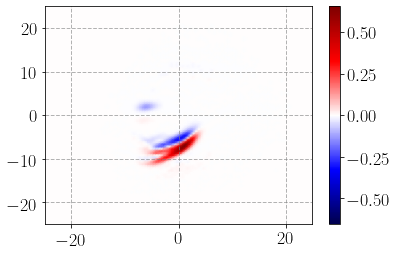

In [179]:
#plot
make_C_pmesh(vy_xy,vx_xy,vmax,CEy_xy)

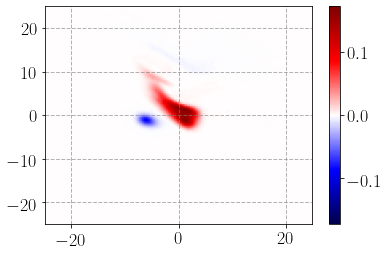

In [180]:
make_C_pmesh(vz_xz,vx_xz,vmax,CEy_xz)

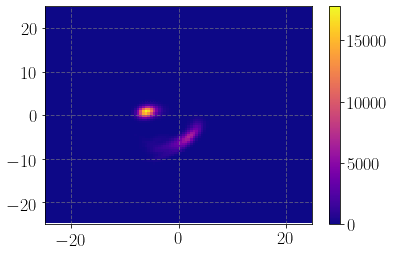

In [181]:
make_H_pmesh(vy_xy,vx_xy,vmax,H_xy)

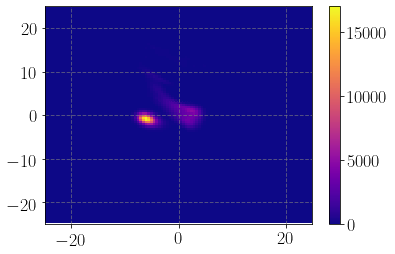

In [182]:
make_H_pmesh(vz_xz,vx_xz,vmax,H_xz)

In [62]:
ncflnm = '../junoM06_th45_ppc10000resultst40003di/FPCnometadata.nc'
Hist, CEx, CEy, CEz, vx, vy, vz, x, enerCEx, enerCEy, enerCEz, Vframe_relative_to_sim, metadata_in, params_in = dnc.load3Vnetcdf4(ncflnm)

In [63]:
vmax = 25.

In [134]:
#Plot FPCs and dist funcs at end val--------------------------------------------------------------
#grab index of starval
i = ao.find_nearest(x, 40.0)

#Project onto 2d axis
H_xy = ao.array_3d_to_2d(Hist[i],'xy')
H_xz = ao.array_3d_to_2d(Hist[i],'xz')
H_yz = ao.array_3d_to_2d(Hist[i],'yz')
CEx_xy = ao.array_3d_to_2d(CEx[i],'xy')
CEx_xz = ao.array_3d_to_2d(CEx[i],'xz')
CEx_yz = ao.array_3d_to_2d(CEx[i],'yz')
CEy_xy = ao.array_3d_to_2d(CEy[i],'xy')
CEy_xz = ao.array_3d_to_2d(CEy[i],'xz')
CEy_yz = ao.array_3d_to_2d(CEy[i],'yz')
CEz_xy = ao.array_3d_to_2d(CEz[i],'xy')
CEz_xz = ao.array_3d_to_2d(CEz[i],'xz')
CEz_yz = ao.array_3d_to_2d(CEz[i],'yz')

vx_xy, vy_xy = ao.mesh_3d_to_2d(vx,vy,vz,'xy')
vx_xz, vz_xz = ao.mesh_3d_to_2d(vx,vy,vz,'xz')
vy_yz, vz_yz = ao.mesh_3d_to_2d(vx,vy,vz,'yz')

#plot
# pltvv.plot_cor_and_dist_supergrid(vx, vy, vz, vmax,
#                                 H_xy, H_xz, H_yz,
#                                 CEx_xy,CEx_xz, CEx_yz,
#                                 CEy_xy,CEy_xz, CEy_yz,
#                                 CEz_xy,CEz_xz, CEz_yz,flnm=resultsdir+resultstag+'superplotendval.png')
# pltvv.plot_cor_and_dist_supergrid(vx, vy, vz, vmax,
#                                 H_xy, H_xz, H_yz,
#                                 CEx_xy,CEx_xz, CEx_yz,
#                                 CEy_xy,CEy_xz, CEy_yz,
#                                 CEz_xy,CEz_xz, CEz_yz)

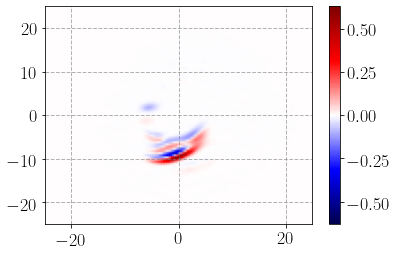

In [135]:
#plot
make_C_pmesh(vy_xy,vx_xy,vmax,CEy_xy)

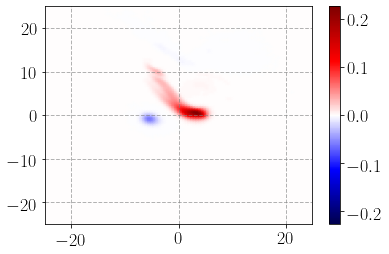

In [136]:
make_C_pmesh(vz_xz,vx_xz,vmax,CEy_xz)

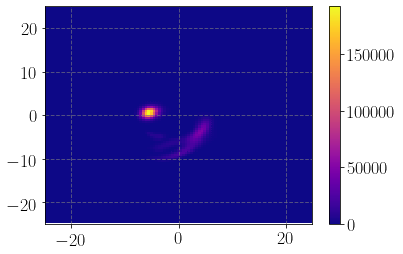

In [137]:
make_H_pmesh(vy_xy,vx_xy,vmax,H_xy)

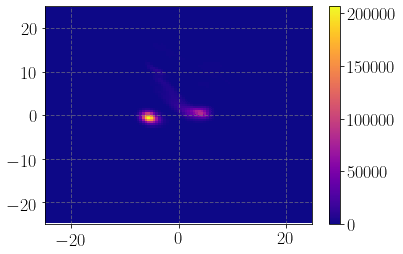

In [138]:
make_H_pmesh(vz_xz,vx_xz,vmax,H_xz)